# Object classification using CNN

This project involved designing three neural networks to solve the object classification problem.

- Since the variety of data in each class was significant compared to the learning data, I am still waiting for a substantial result from the first network I designed.

- It was fantastic to use VGG's design in the second grid and apply its learned weights to my data.

- As I expected, the third network's result was weaker than the second one when I changed its five layers' weights in the learning phase.

# Trained Model

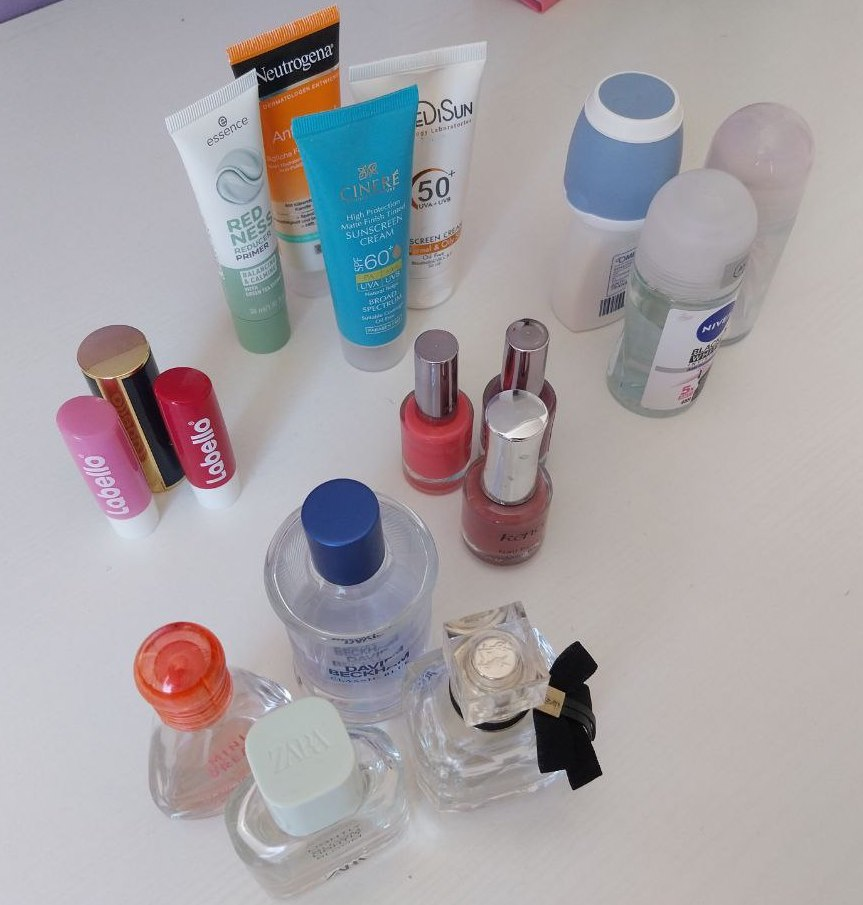

In [1]:
from IPython import display
display.Image("samples.jpg")

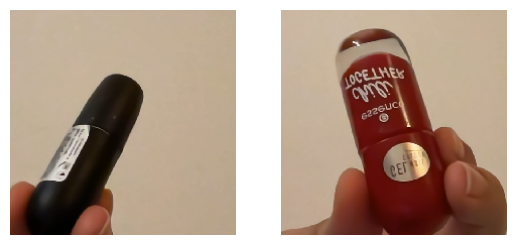

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_A = mpimg.imread('./20-43-48-875635.png')
img_B = mpimg.imread('./20-39-11-233998.png')

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_B)
ax[0].axis('off')
ax[1].imshow(img_A)
ax[1].axis('off')
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, ZeroPadding2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
import os
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6)
import warnings
warnings.filterwarnings('ignore')

Loading data:

In [4]:
from skimage.io import imread_collection
from sklearn.model_selection import train_test_split

folders = [folder for folder in os.listdir('./images') if folder[0] != "."]
images = []
X_train = []
X_test = []
y_train = []
y_test = []
for i, folder in enumerate(folders):
    folder_name = imread_collection(f'images/{folder}/*.png')
    #folder_name = np.array(folder_name)
    images.extend(folder_name)
    y = np.ones(120)*(i)
    y1 , y2 = train_test_split(y, test_size=0.2)
    y_train.extend(y1)
    y_test.extend(y2)
    x_train, x_test = train_test_split(
        folder_name,
        test_size=0.2, 
        random_state=42, 
        shuffle=True, 
        stratify=None)
    X_train.extend(x_train)
    X_test.extend(x_test)


X_train = np.array(X_train)/255
X_test = np.array(X_test)/255
y_train = np.array(y_train)
y_test = np.array(y_test)

train_shuffler = np.random.permutation(len(X_train))
X_train = X_train[train_shuffler]
y_train = y_train[train_shuffler]

test_shuffler = np.random.permutation(len(X_test))
X_test = X_test[test_shuffler]
y_test = y_test[test_shuffler]

Some of the train data:

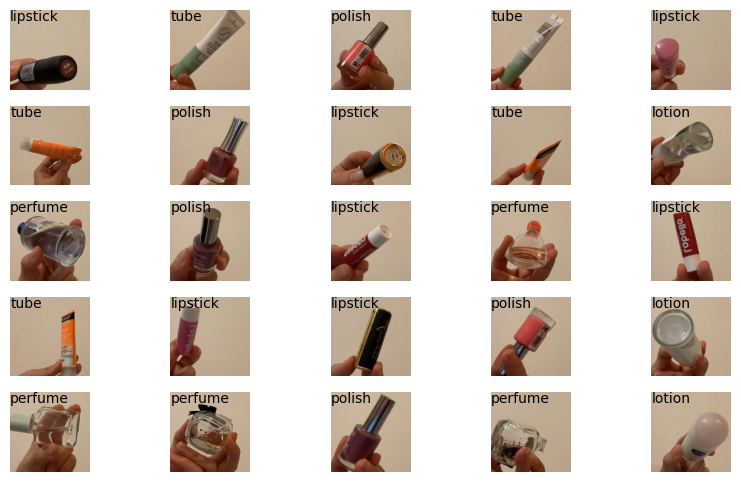

In [6]:
j = 0
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i+j+4])
    plt.axis('off')
    plt.text(0, 30, folders[int(y_train[i+j+4])])
    j += 18
    # displays y-values in each subplot

Some of the test data:

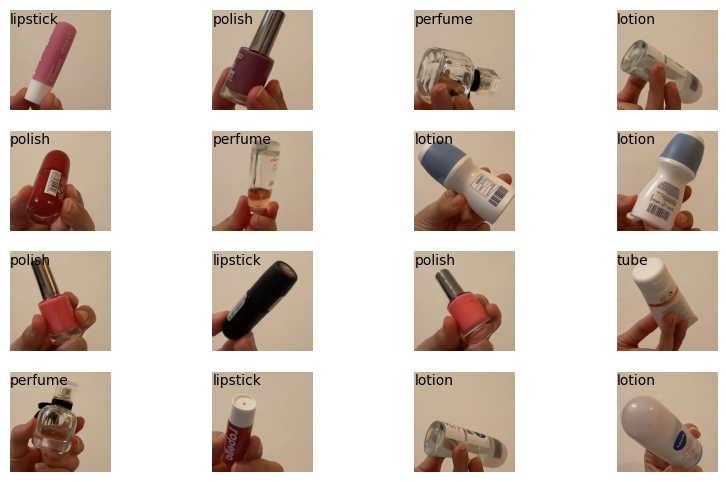

In [8]:
j = 0
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_test[i+j+5])
    plt.axis('off')
    plt.text(0, 30, folders[int(y_test[i+j+5])])
    j += 6
    # displays y-values in each subplot

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((480, 224, 224, 3), (480,), (120, 224, 224, 3), (120,))

0.0


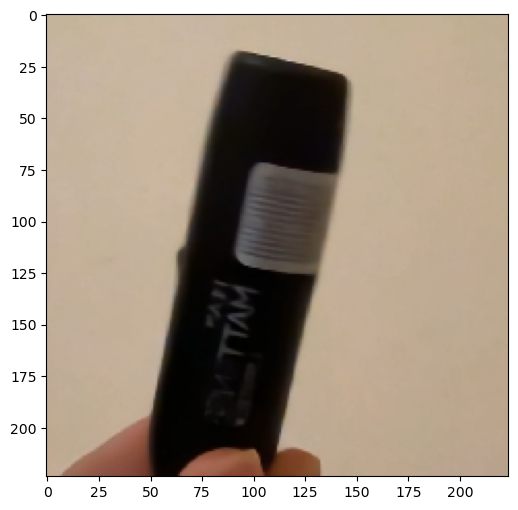

In [10]:
n = 216
print(y_train[n])
plt.imshow(X_train[n], cmap="gray")
plt.show()

In [11]:
from skimage.color import rgb2gray

In [12]:
Xtrain  = rgb2gray(X_train)
Xtest = rgb2gray(X_test)
Xtrain = np.expand_dims(Xtrain, axis=3)
Xtest = np.expand_dims(Xtest, axis=3)

In [13]:
Xtrain.shape, Xtest.shape

((480, 224, 224, 1), (120, 224, 224, 1))

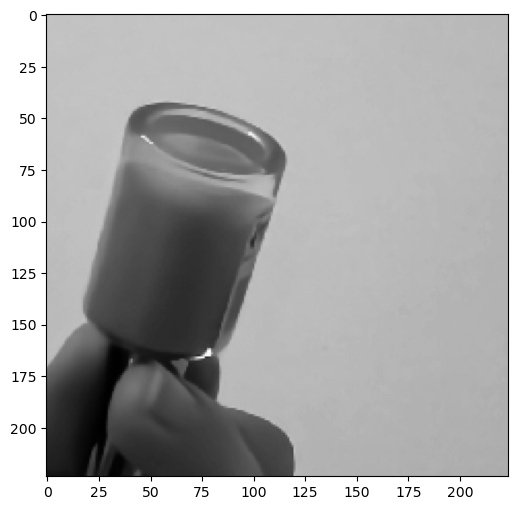

In [14]:
plt.imshow(Xtrain[100], cmap=plt.cm.gray)

In [15]:
ytrain = to_categorical(y_train)
ytest = to_categorical(y_test)
ytrain.shape, ytest.shape

((480, 5), (120, 5))

## Define the model

### Clear session 

In [16]:
from tensorflow.keras import backend as K
K.clear_session()

### Create the architecture

In [17]:
model_2 = Sequential([
    
    # first convolutional and max pooling layer
    Conv2D(filters=6,
          kernel_size=(3,3),
          strides=(1,1),
          padding="same",
          activation="relu",
          input_shape=(224, 224, 1)),
    MaxPooling2D(pool_size=(2,2),
                strides=(2,2),
                padding="same"),
    #BatchNormalization(), # optional
    
    # Second convolutional and max pooling layer
    Conv2D(filters=16,
          kernel_size=(3,3),
          strides=(1,1),
          padding="same",
          activation="relu"),
    MaxPooling2D(pool_size=(2,2),
                strides=(2,2),
                padding="same"),
    
    # Flatten
    Flatten(),
    
    
    # Fully connected
    # layer 1
    Dense(180, activation="relu"),
    #Dropout(0.2), # optional
    
    # layer 2
    Dense(120, activation="relu"),
    #Dropout(0.2), # optional
    
    # layer 3
    Dense(60, activation="relu"),
    #Dropout(0.2), # optional
    
    # Dense(25, activation="relu"), # you can add as many layers as you wish
    
    # Output layer
    Dense(5, activation="softmax")
])

Metal device set to: Apple M1 Pro


2023-03-13 15:47:35.422479: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-13 15:47:35.422623: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


#### Check the model summary

In [18]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 6)       60        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 6)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 16)      880       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 180)               9

### Compile the model
- **Optimizer:** Adam optimizer. Load it from keras
- **Loss:** categorical_crossentropy
- **Metrics:** accuracy

In [19]:
from tensorflow.keras.optimizers import Adam

In [20]:
model_2.compile(optimizer=Adam(), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

### Fit the model
- epochs = 20
- batch size = 10

In [21]:
fit_history = model_2.fit(Xtrain, ytrain, batch_size=10, epochs=20, validation_data=(Xtest, ytest))

Epoch 1/20


2023-03-13 15:47:58.020645: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 1/48 [..............................] - ETA: 22s - loss: 1.6358 - accuracy: 0.1000

2023-03-13 15:47:58.328288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


48/48 [==============================] - 2s 24ms/step - loss: 1.6269 - accuracy: 0.2396 - val_loss: 1.5830 - val_accuracy: 0.2000
Epoch 2/20
 1/48 [..............................] - ETA: 1s - loss: 1.5273 - accuracy: 0.3000

2023-03-13 15:47:59.515821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


48/48 [==============================] - 1s 21ms/step - loss: 1.3661 - accuracy: 0.4500 - val_loss: 1.4011 - val_accuracy: 0.4417
Epoch 3/20
48/48 [==============================] - 1s 21ms/step - loss: 0.7345 - accuracy: 0.7792 - val_loss: 1.6940 - val_accuracy: 0.4333
Epoch 4/20
48/48 [==============================] - 1s 21ms/step - loss: 0.2303 - accuracy: 0.9417 - val_loss: 1.7306 - val_accuracy: 0.4917
Epoch 5/20
48/48 [==============================] - 1s 21ms/step - loss: 0.0703 - accuracy: 0.9854 - val_loss: 1.7255 - val_accuracy: 0.5000
Epoch 6/20
48/48 [==============================] - 1s 21ms/step - loss: 0.0227 - accuracy: 0.9938 - val_loss: 1.9632 - val_accuracy: 0.4667
Epoch 7/20
48/48 [==============================] - 1s 22ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 2.2782 - val_accuracy: 0.4917
Epoch 8/20
48/48 [==============================] - 1s 22ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.3860 - val_accuracy: 0.5000
Epoch 9/20
48/48 [======

In [22]:
model_2.save('your_project_name.h5')

### Evaluate model
- Plot the accuracy and loss

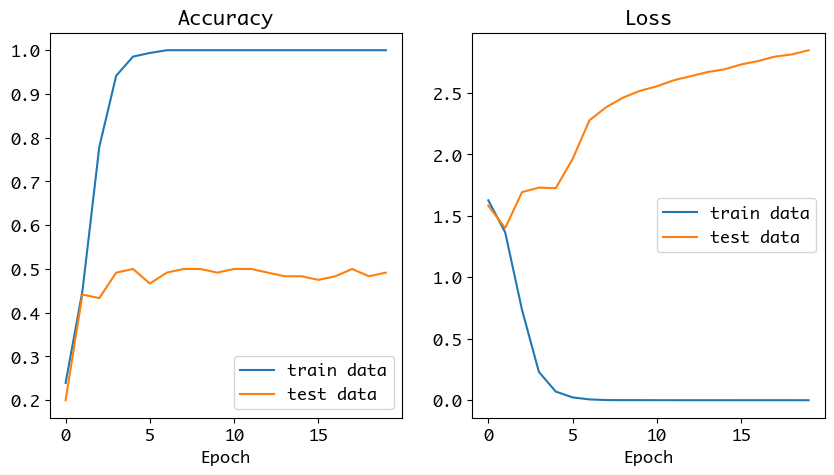

In [24]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.family"] = "monaco"
plt.rcParams["font.size"] = 12
plt.rcParams["font.weight"] = "bold"
plt.subplot(1, 2, 1)
plt.plot(fit_history.history["accuracy"], label="train data")
plt.plot(fit_history.history["val_accuracy"], label="test data")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.legend();
plt.subplot(1, 2, 2)
plt.plot(fit_history.history["loss"], label="train data")
plt.plot(fit_history.history["val_loss"], label="test data")
plt.title("Loss")
plt.xlabel("Epoch")
plt.legend();

### Prediction

In [25]:
Xtest.shape

(120, 224, 224, 1)

In [26]:
ypred = model_2.predict(Xtest)

4/4 [==============================] - 0s 23ms/step


2023-03-13 15:48:33.336723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [27]:
y_test[10]

4.0

In [28]:
np.argmax(ypred[10])

1

In [29]:
ypred.shape

(120, 5)

#### 8.1 Take the highest probability from ypred


In [30]:
y_pred_labels = np.argmax(ypred, axis=1)

In [31]:
y_pred_labels

array([4, 2, 0, 4, 0, 0, 2, 3, 4, 3, 1, 1, 4, 2, 0, 1, 1, 3, 3, 4, 4, 2,
       4, 2, 0, 3, 1, 2, 4, 2, 4, 4, 3, 4, 2, 0, 0, 0, 3, 0, 1, 3, 4, 2,
       1, 2, 2, 4, 1, 2, 1, 1, 0, 2, 3, 0, 1, 1, 4, 2, 0, 4, 1, 4, 1, 2,
       1, 2, 0, 3, 3, 1, 1, 2, 2, 2, 2, 0, 4, 2, 0, 4, 1, 3, 1, 0, 3, 0,
       1, 2, 4, 2, 4, 2, 3, 2, 0, 0, 3, 0, 4, 3, 3, 2, 4, 4, 1, 0, 2, 0,
       3, 0, 3, 4, 4, 3, 1, 0, 0, 3])

#### Create a confusion matrix

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [33]:
plt.rcParams["figure.figsize"] = (8, 8)

In [34]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_labels)

In [35]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=folders)

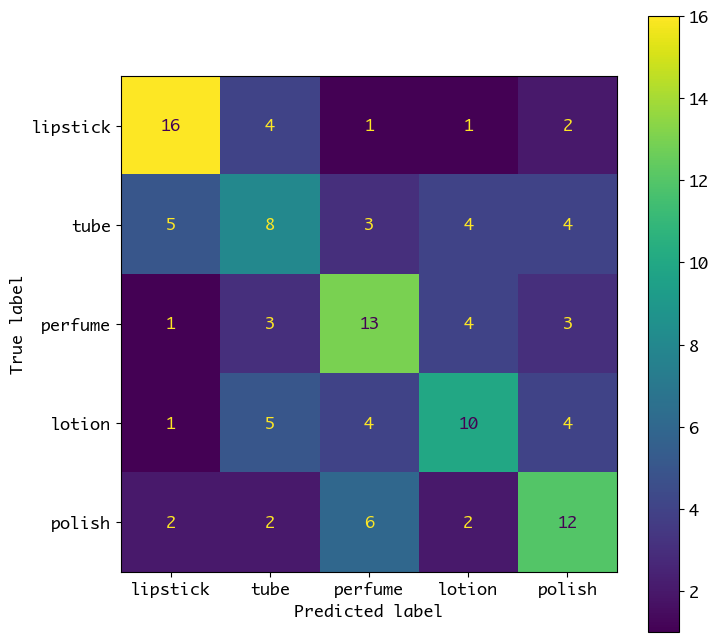

In [36]:
disp.plot();

In [37]:
folders

['lipstick', 'tube', 'perfume', 'lotion', 'polish']

# Pretrained model

In [39]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow import keras
import numpy as np
import pandas as pd
import os

## Instantiate the model

In [40]:
#full model
vgg_model = keras.applications.vgg16.VGG16(weights='imagenet')

**Summary**

In [41]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [42]:
print(f"The full model has {len(vgg_model.layers)} layers")

The full model has 23 layers


### Create a base model 

We exclude the top part, referring to the classification layers.
Doing so our model is capable of extracting features.

In [43]:
base_model = keras.applications.vgg16.VGG16(weights='imagenet',
                                            input_shape=(224,224,3), #This is where you specify the input shape
                                            include_top=False) #this is where we take off the Dense/prediction layers

In [44]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [45]:
print(f"Excluding the top layers the base model contains {len(base_model.layers)} layers")

Excluding the top layers the base model contains 19 layers


**At this point depending on your problem you could decide either to frozen (not train) all the base model layers or make few of them trainable.**

In [46]:
base_model.layers

In [126]:
# important!! to freeze all the layers
for layers in base_model.layers[:]: 
    layers.trainable = False # --> all layers frozen means they are not trainable

In [127]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [59]:
# Also important!!
#to unfreeze some layers
#unfreeze_layers = 5
#for layers in base_model.layers[-unfreeze_layers:]: # --> last 5 layers trainable
 #   layers.trainable = True

### Feature extraction + Logistic  Regression: 

**Calculate feature vector for all images
use `base_model.predict(X)`**

In [15]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
                                                                 


**Now we don't fit, we just predict** to extract the features

In [16]:
out_features_vector = base_model.predict(X_train)
out_features_vector.shape

In [17]:
X_train.shape

**To feed the Logistic Regression model,  we need to flatten out_features_vector**

In [18]:
X_reshaped = out_features_vector.reshape((480,-1))
X_reshaped.shape

####  Train Test split

In [51]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [52]:
X2train,X2test,y2train,y2test = train_test_split(X_reshaped, 
                                             y_train, 
                                             test_size=.30,
                                             random_state=42)

#### train a Logistic Regression model
determine a training, test accuracy and cross-validation score

In [53]:
log_reg = LogisticRegression()
log_reg.fit(X2train,y2train)

LogisticRegression()

In [54]:
ypred_train=log_reg.predict(X2train)
ypred_test = log_reg.predict(X2test)

In [55]:
ypred_train

array([4., 0., 1., 3., 2., 0., 3., 1., 0., 0., 4., 1., 0., 1., 4., 1., 1.,
       2., 4., 1., 3., 3., 2., 2., 2., 4., 1., 3., 0., 2., 1., 3., 2., 2.,
       1., 2., 1., 2., 1., 4., 4., 0., 3., 1., 3., 2., 0., 3., 4., 2., 1.,
       2., 3., 4., 3., 2., 3., 3., 3., 4., 0., 2., 1., 3., 2., 2., 2., 0.,
       1., 2., 3., 0., 3., 3., 1., 1., 1., 3., 1., 2., 0., 3., 1., 0., 0.,
       4., 1., 4., 3., 2., 2., 3., 4., 2., 0., 1., 1., 2., 1., 0., 0., 4.,
       0., 4., 1., 3., 1., 1., 2., 3., 4., 2., 1., 3., 1., 1., 2., 2., 3.,
       2., 3., 3., 3., 4., 1., 3., 2., 4., 2., 1., 4., 2., 3., 4., 2., 3.,
       4., 3., 4., 1., 1., 3., 3., 3., 4., 3., 2., 3., 1., 1., 2., 2., 2.,
       1., 1., 3., 2., 4., 3., 1., 2., 4., 1., 3., 3., 1., 4., 0., 4., 0.,
       2., 0., 2., 1., 1., 0., 0., 0., 1., 1., 4., 4., 2., 0., 0., 2., 4.,
       3., 1., 0., 3., 2., 2., 2., 4., 0., 2., 4., 1., 2., 4., 2., 1., 1.,
       3., 2., 0., 0., 0., 2., 3., 2., 4., 0., 3., 2., 2., 3., 1., 4., 1.,
       0., 1., 1., 4., 0.

In [56]:
# validation
scores_train = cross_val_score(log_reg,X2train,y2train,cv=10)
scores_train

array([0.91176471, 0.91176471, 0.91176471, 0.91176471, 0.94117647,
       0.79411765, 1.        , 0.96969697, 0.93939394, 0.84848485])

In [57]:
print(f"accuracy score on train: {accuracy_score(y2train,ypred_train)}")
print(f"accuracy score on test: {accuracy_score(y2test,ypred_test)}")


accuracy score on train: 1.0
accuracy score on test: 0.8958333333333334


In [58]:
X2test.shape

(144, 25088)

----

## Base Model + Customized Dense Layers for Classification

+ fc1 with 30 neurons and activation relu
+ fc2 with 15 neurons and activation relu
+ prediction with 1 neurons for classification

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, ytrain.shape, ytest.shape

((480, 224, 224, 3), (120, 224, 224, 3), (480,), (120,), (480, 5), (120, 5))

In [50]:
from tensorflow.keras import backend as K

In [51]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       295168

### Configure the model

In [52]:
K.clear_session()
new_model = keras.models.Sequential([
    
    # Base model
    base_model,
    
    # Flatten layer
    keras.layers.Flatten(),
    
    #keras.layers.Dropout(.5),
    # fc1 fully connected layer
    keras.layers.Dense(units=30, activation=keras.activations.relu, name='fc1'),
    
    # fc2 fully connected layer
    keras.layers.Dense(units=15, activation=keras.activations.relu, name='fc2'),
    
    # output layer
    keras.layers.Dense(units=5, activation=keras.activations.softmax , name='output')

])

In [53]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 fc1 (Dense)                 (None, 30)                752670    
                                                                 
 fc2 (Dense)                 (None, 15)                465       
                                                                 
 output (Dense)              (None, 5)                 80        
                                                                 
Total params: 15,467,903
Trainable params: 753,215
Non-trainable params: 14,714,688
_________________________________________________________________


#### Compile the new model

In [54]:
from tensorflow.keras.optimizers import Adam

In [55]:
new_model.compile(optimizer=Adam(), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

In [27]:
# new_model.compile(loss=keras.losses.CategoricalCrossentropy,
#                   optimizer=keras.optimizers.Adam(learning_rate=1e-5),
#                  metrics=['accuracy'])

#### Fit the new model

In [56]:
X_train.shape, ytrain.shape

((480, 224, 224, 3), (480, 5))

In [57]:
history = new_model.fit(X_train, ytrain, batch_size=20, epochs=10)

Epoch 1/10


2023-03-13 15:50:06.668130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 5s 162ms/step - loss: 1.4162 - accuracy: 0.3979
Epoch 2/10
24/24 [==============================] - 4s 161ms/step - loss: 0.7202 - accuracy: 0.7396
Epoch 3/10
24/24 [==============================] - 4s 161ms/step - loss: 0.3097 - accuracy: 0.9271
Epoch 4/10
24/24 [==============================] - 4s 161ms/step - loss: 0.1436 - accuracy: 0.9875
Epoch 5/10
24/24 [==============================] - 4s 162ms/step - loss: 0.0829 - accuracy: 0.9979
Epoch 6/10
24/24 [==============================] - 4s 166ms/step - loss: 0.0468 - accuracy: 0.9979
Epoch 7/10
24/24 [==============================] - 4s 162ms/step - loss: 0.0295 - accuracy: 1.0000
Epoch 8/10
24/24 [==============================] - 4s 162ms/step - loss: 0.0224 - accuracy: 1.0000
Epoch 9/10
24/24 [==============================] - 4s 162ms/step - loss: 0.0164 - accuracy: 1.0000
Epoch 10/10
24/24 [==============================] - 4s 162ms/step - loss: 0.0129 - accuracy: 1.0000


#### Plot the results

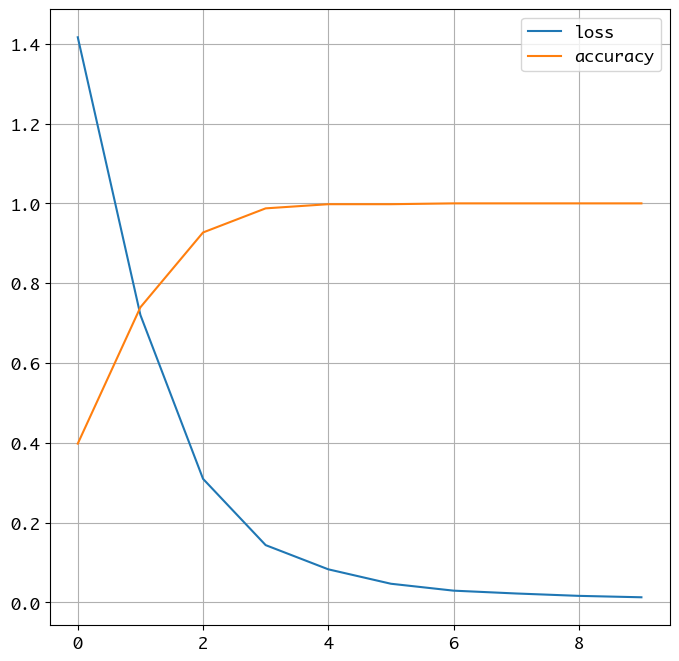

In [58]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.savefig('conv_frozen_new_fcl.png')

### Prediction

In [59]:
X_test.shape

(120, 224, 224, 3)

In [60]:
y_new_pred = new_model.predict(X_test)

1/4 [======>.......................] - ETA: 0s

2023-03-13 15:50:54.075529: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 2s 482ms/step


In [61]:
y_test[10]

4.0

In [62]:
np.argmax(y_new_pred[10])

0

In [63]:
y_new_pred.shape

(120, 5)

#### Take the highest probability from ypred


In [64]:
y_new_pred_labels = np.argmax(y_new_pred, axis=1)

In [65]:
y_new_pred_labels.reshape(5,24)

array([[4, 1, 0, 3, 0, 0, 2, 3, 4, 3, 0, 1, 4, 4, 0, 1, 1, 3, 2, 2, 4, 4,
        1, 4],
       [4, 1, 3, 2, 0, 2, 4, 4, 3, 4, 4, 1, 1, 0, 2, 0, 2, 2, 1, 3, 0, 0,
        2, 3],
       [2, 2, 1, 1, 3, 2, 3, 0, 3, 0, 4, 2, 1, 4, 1, 3, 3, 1, 0, 2, 0, 3,
        4, 3],
       [0, 3, 1, 4, 2, 0, 4, 4, 0, 2, 1, 1, 4, 4, 1, 2, 1, 2, 1, 2, 4, 2,
        0, 3],
       [0, 1, 3, 2, 2, 3, 4, 4, 1, 3, 2, 0, 2, 0, 3, 0, 3, 4, 0, 3, 1, 0,
        1, 1]])

#### Create a confusion matrix

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [67]:
plt.rcParams["figure.figsize"] = (8, 8)

In [68]:
cm = confusion_matrix(y_true=y_test, y_pred=y_new_pred_labels)

In [69]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=folders)

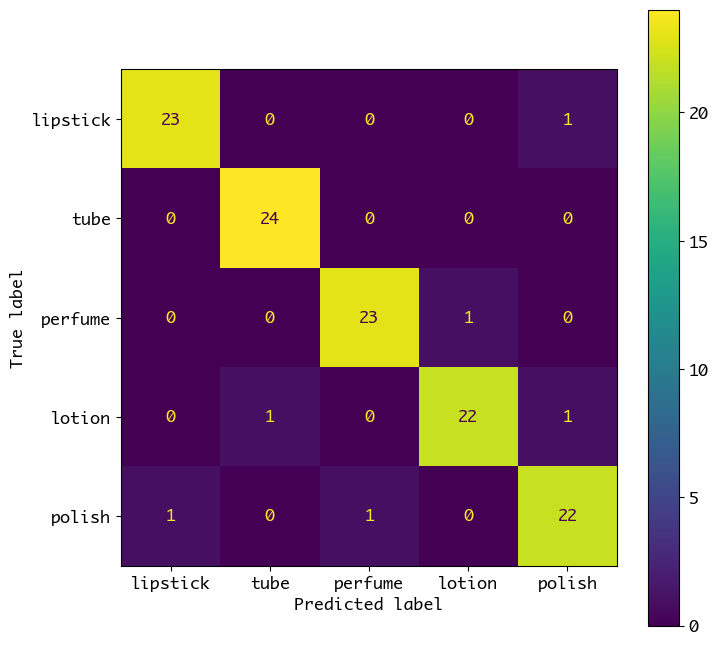

In [70]:
disp.plot();

In [71]:
folders

['lipstick', 'tube', 'perfume', 'lotion', 'polish']

In [72]:
new_model.save('your_other_project.h5')

## Fine tuning the pretrained model

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [129]:
base_model.layers

In [130]:
#to unfreeze some layers
unfreeze_layers = 5
for layers in base_model.layers[-unfreeze_layers:]: # --> last 5 layers trainable
    layers.trainable = True

In [131]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       295168

### Configure new model

In [132]:
K.clear_session()
tuned_model = keras.models.Sequential([
    
    # Base model
    base_model,
    
    # Flatten layer
    keras.layers.Flatten(),
    
    #keras.layers.Dropout(.5),
    # fc1 fully connected layer
    keras.layers.Dense(units=30, activation=keras.activations.relu, name='fc1'),
    
    # fc2 fully connected layer
    keras.layers.Dense(units=15, activation=keras.activations.relu, name='fc2'),
    
    # output layer
    keras.layers.Dense(units=5, activation=keras.activations.softmax, name='output')

])

In [133]:
tuned_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 fc1 (Dense)                 (None, 30)                752670    
                                                                 
 fc2 (Dense)                 (None, 15)                465       
                                                                 
 output (Dense)              (None, 5)                 80        
                                                                 
Total params: 15,467,903
Trainable params: 7,832,639
Non-trainable params: 7,635,264
_________________________________________________________________


### Compile the new model

In [134]:
tuned_model.compile(optimizer=Adam(), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

#### Fit the model

In [135]:
X_train.shape, ytrain.shape, X_test.shape, ytest.shape

((480, 224, 224, 3), (480, 5), (120, 224, 224, 3), (120, 5))

In [136]:
tuned_history = tuned_model.fit(X_train, ytrain, batch_size=10, epochs=20, validation_data=(X_test, ytest))

Epoch 1/20


2023-03-13 16:21:06.030778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


48/48 [==============================] - ETA: 0s - loss: 0.5279 - accuracy: 0.8354

2023-03-13 16:21:11.280272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


48/48 [==============================] - 7s 128ms/step - loss: 0.5279 - accuracy: 0.8354 - val_loss: 0.1870 - val_accuracy: 0.9583
Epoch 2/20
48/48 [==============================] - 6s 124ms/step - loss: 0.0442 - accuracy: 0.9833 - val_loss: 0.3301 - val_accuracy: 0.9417
Epoch 3/20
48/48 [==============================] - 6s 124ms/step - loss: 0.0627 - accuracy: 0.9958 - val_loss: 0.5478 - val_accuracy: 0.9250
Epoch 4/20
48/48 [==============================] - 6s 124ms/step - loss: 0.0150 - accuracy: 0.9958 - val_loss: 0.2997 - val_accuracy: 0.9417
Epoch 5/20
48/48 [==============================] - 6s 124ms/step - loss: 0.3847 - accuracy: 0.9688 - val_loss: 0.4288 - val_accuracy: 0.8500
Epoch 6/20
48/48 [==============================] - 6s 124ms/step - loss: 0.2898 - accuracy: 0.9271 - val_loss: 0.6410 - val_accuracy: 0.8583
Epoch 7/20
48/48 [==============================] - 6s 124ms/step - loss: 0.4097 - accuracy: 0.9479 - val_loss: 0.3268 - val_accuracy: 0.8917
Epoch 8/20
48/48 

### Plot the results

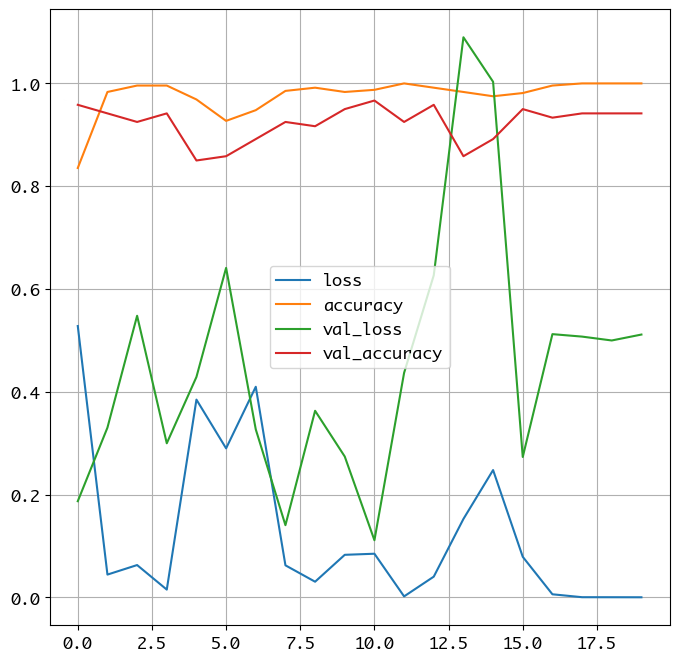

In [137]:
pd.DataFrame(tuned_history.history).plot()
plt.grid(True)


### Prediction

In [138]:
X_test.shape

(120, 224, 224, 3)

In [139]:
y_tuned_pred = tuned_model.predict(X_test)

2023-03-13 16:23:32.576190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 296ms/step


In [140]:
y_test[20]

4.0

In [141]:
np.argmax(y_tuned_pred[20])

4

In [142]:
y_tuned_pred.shape

(120, 5)

#### Take the highest probability from ypred


In [143]:
y_tuned_pred_labels = np.argmax(y_tuned_pred, axis=1)

In [144]:
y_tuned_pred_labels.reshape(5,24)

array([[4, 1, 0, 3, 0, 0, 2, 3, 4, 1, 0, 4, 4, 4, 0, 1, 3, 3, 2, 2, 4, 4,
        1, 4],
       [4, 1, 2, 2, 0, 2, 4, 4, 3, 4, 4, 1, 0, 0, 2, 0, 2, 2, 1, 3, 0, 0,
        2, 3],
       [2, 2, 1, 1, 3, 2, 3, 0, 3, 0, 4, 2, 1, 4, 1, 3, 3, 1, 0, 2, 0, 2,
        4, 3],
       [0, 3, 1, 4, 2, 0, 4, 4, 0, 2, 1, 1, 0, 0, 1, 4, 1, 2, 1, 2, 4, 2,
        0, 3],
       [0, 1, 3, 2, 2, 3, 4, 2, 1, 3, 2, 0, 2, 0, 3, 0, 3, 4, 0, 3, 1, 0,
        1, 1]])

#### Create a confusion matrix

In [145]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [146]:
plt.rcParams["figure.figsize"] = (8, 8)

In [147]:
cm = confusion_matrix(y_true=y_test, y_pred=y_tuned_pred_labels)

In [148]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=folders)

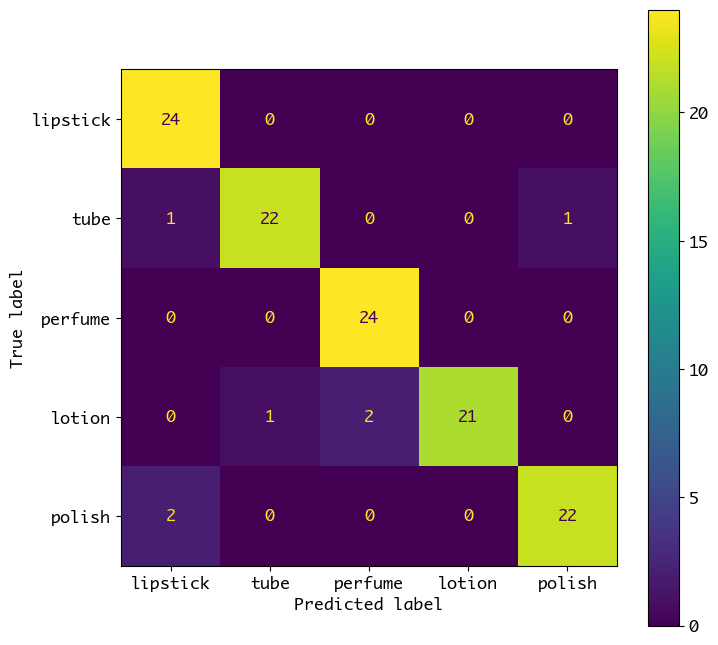

In [149]:
disp.plot();

In [71]:
folders

['lipstick', 'tube', 'perfume', 'lotion', 'polish']